# Assignment

I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.


# Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.


# Description of Variables

The dataset contains 6366 observations of 9 variables:

        1.rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

        2.age: woman's age

        3. yrs_married: number of years married

        4.children: number of children

        5. religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)

        6. educ:  level of education (9 = grade school, 12 = high school, 

                                  14 = some college, 16 = college graduate,

                                  17 = some graduate school, 20 = advanced degree)

        7. occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled,

                                          3 = "white collar", 4 = teacher/nurse/writer/technician/skilled,

                                          5 = managerial/business, 6 = professional with advanced degree)

        8.occupation_husb: husband's occupation (same coding as above)

        9.affairs: time spent in extra-marital affairs


# Code to loading data and modules:

In [1]:


import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices


from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate
#from sklearn.cross_validation import train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_validate
#from sklearn.cross_validation import cross_val_score 
from sklearn.model_selection import cross_val_score





In [2]:
dta =sm.datasets.fair.load_pandas().data
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)


In [4]:
dta['affair']

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

In [5]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [6]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [7]:
print("Features names: ",dta.columns)
print(3*'\n')
print("Number of rows and columns: ", dta.shape)


Features names:  Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')




Number of rows and columns:  (6366, 10)


In [8]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [9]:
item_counts = dta[dta.columns].value_counts()
print(item_counts)

rate_marriage  age   yrs_married  children  religious  educ  occupation  occupation_husb  affairs   affair
5.0            22.0  2.5          0.0       2.0        14.0  3.0         5.0              0.000000  0         15
                                                                         4.0              0.000000  0         15
4.0            22.0  2.5          0.0       2.0        14.0  3.0         4.0              0.000000  0         12
5.0            22.0  2.5          0.0       3.0        14.0  3.0         4.0              0.000000  0         11
                                                       12.0  3.0         2.0              0.000000  0         11
                                                                                                              ..
4.0            27.0  0.5          0.0       2.0        20.0  4.0         5.0              0.000000  0          1
                                                       17.0  4.0         4.0              0.000000  0 

In [10]:
import numpy as np
import pandas as pd

#using pandas.tseries instead of statsmodels.api

import pandas.tseries as pdt
import matplotlib.pyplot as plt
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import cross_val_score

#To avoid warnings
import warnings
warnings.filterwarnings('ignore')
dta = sm.datasets.fair.load_pandas().data
df_affair = dta.copy()

import seaborn as sns

In [11]:
# add "affair" column: 1 represents having affairs, 0 represents not


dta['affair'] = (dta.affairs > 0).astype(int)

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")


X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})


y = np.ravel(y)


In [12]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [13]:
print("Features names: ",dta.columns)
print(3*'\n')
print("Number of rows and columns: ", dta.shape)

Features names:  Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')




Number of rows and columns:  (6366, 10)


In [14]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


# statistics

In [15]:
print("Lets analyze the data and look at the summary statistics")
dta.describe()


Lets analyze the data and look at the summary statistics


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


# Visualization of the data

array([[<AxesSubplot:title={'center':'rate_marriage'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'yrs_married'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'religious'}>,
        <AxesSubplot:title={'center':'educ'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'occupation_husb'}>,
        <AxesSubplot:title={'center':'affairs'}>],
       [<AxesSubplot:title={'center':'affair'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1440x1296 with 0 Axes>

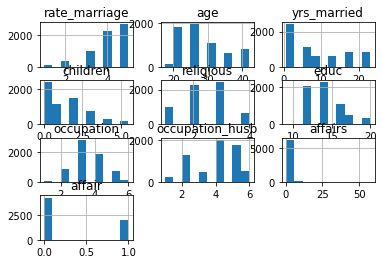

In [16]:
# plot all of the columns
%matplotlib inline
plt.figure(figsize=(20,18))
dta.hist()


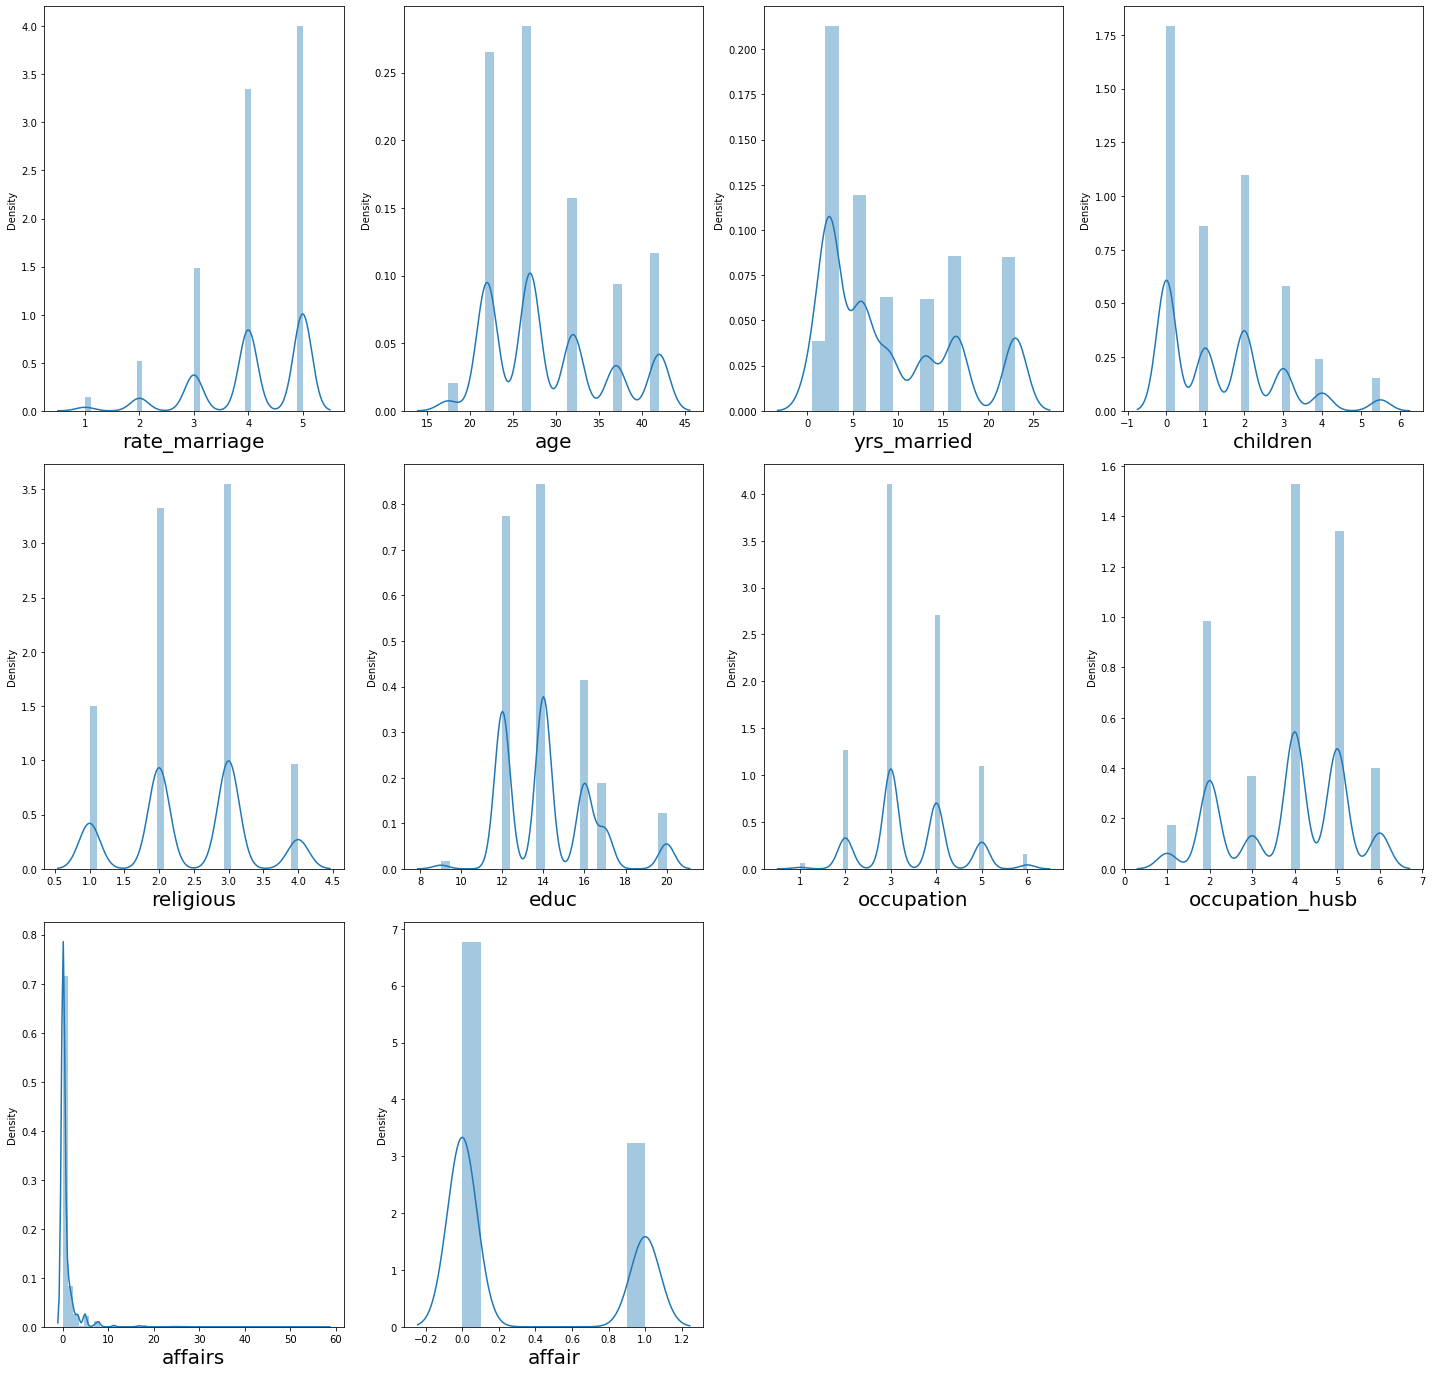

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


# model Evaluation

In [18]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Split the data into training and test set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [20]:
#We will use the statsmodels Logit function for logistic regression

logit = sm.Logit(y_train, X_train)

# fit the model

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.544479
         Iterations 6


In [21]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(logit,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [22]:
predictions = result.predict(X_test)
predictions


2764    0.653211
4481    0.087718
5360    0.273074
5802    0.249471
1220    0.249630
          ...   
3053    0.144139
1875    0.207506
5851    0.437646
4962    0.190124
1995    0.249630
Length: 1910, dtype: float64

In [23]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


In [24]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.1360
Time:                        11:11:09   Log-Likelihood:                -2426.2
converged:                       True   LL-Null:                       -2808.3
Covariance Type:            nonrobust   LLR p-value:                2.844e-152
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4842      0.777      3.198      0.001       0.961       4.007
occ_2             0.9414      0.658      1.432      0.152      -0.347       2.230
occ_3             1.2324      0.652      1.890      0.059      -0.046       2.511
occ_4             0.9731      0.653      1.490      0.136      -0.307       2.254
occ_5             1.6017      0.657      2.436      0.015       0.313       2.890
occ_6             1.8242      0.707      2.581      0.010       0.439       3.209
occ_husb_2        0.0649      0.215      0.302      0.762      -0.356       0.486
occ_husb_3        0.1976      0.235      0.841      0.400      -0.263       0.658
occ_husb_4        0.0304      0.208      0.146      0.884      -0.377       0.438
occ_husb_5       -0.0052      0.210     -0.025      0.980      -0.417       0.406
occ_husb_6       -0.0183      0.236     -0.078      0.938      -0.481       0.445
rate_marriage    -0.7145      0.038    -18.929      0.000      -0.788      -0.640
age              -0.0577      0.012     -4.686      0.000      -0.082      -0.034
yrs_married       0.1081      0.013      8.243      0.000       0.082       0.134
children         -0.0126      0.038     -0.329      0.742      -0.088       0.062
religious        -0.3889      0.042     -9.342      0.000      -0.470      -0.307
educ              0.0046      0.021      0.224      0.823      -0.036       0.045
=================================================================================
"""

In [25]:
print("Logistic Regression with scikit-learn")
dta.head()


Logistic Regression with scikit-learn


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [26]:
print('Exploratary data analysis')
# add "affair" column: 1 represents having affairs, 0 represents not

dta['affair'] = (dta.affairs > 0).astype(int)
dta.affair.value_counts()


Exploratary data analysis


0    4313
1    2053
Name: affair, dtype: int64

In [27]:
print("We can conclude that women who have affairs, rate their marriage lower based on our findings from below table")
dta.groupby('affair').mean()

We can conclude that women who have affairs, rate their marriage lower based on our findings from below table


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [28]:
print('Checking rate_marriage paramerter')
print("We can say with an increase in age, yrs_married and children correlate with increase in affairs based on findings")
dta.groupby('rate_marriage').mean()

Checking rate_marriage paramerter
We can say with an increase in age, yrs_married and children correlate with increase in affairs based on findings


,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Lets visualize our data


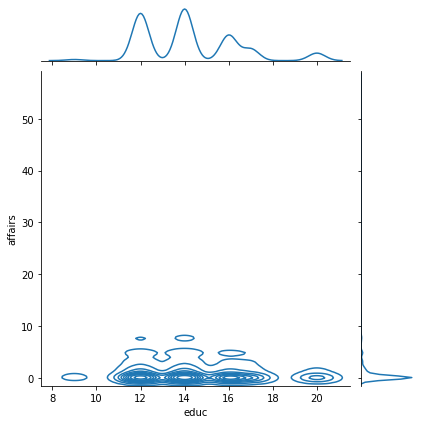

In [29]:
print('Lets visualize our data')
import seaborn as sns
sns.jointplot(x='educ',y='affairs',data=dta,kind='kde')


Text(0, 0.5, 'Frequency')

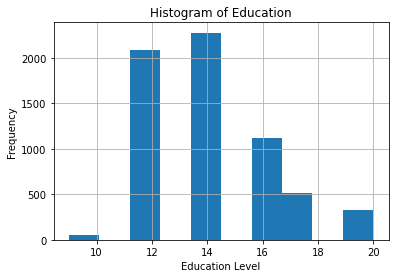

In [30]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

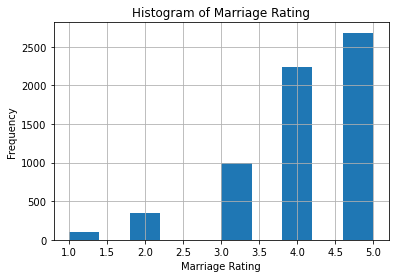

In [31]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

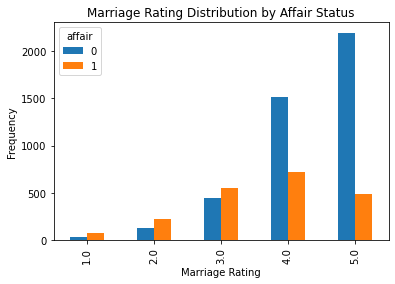

In [32]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

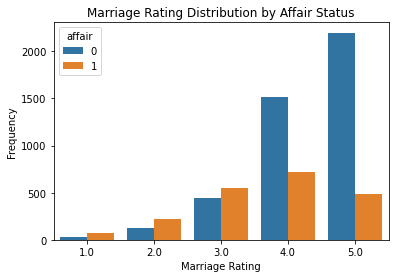

In [33]:
sns.countplot(x='rate_marriage',data=dta,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

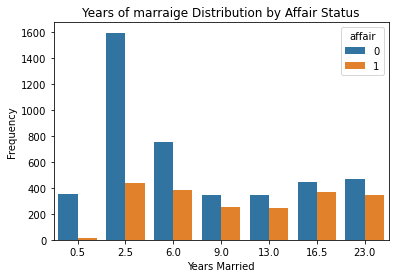

In [34]:
sns.countplot(x='yrs_married',data=dta,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

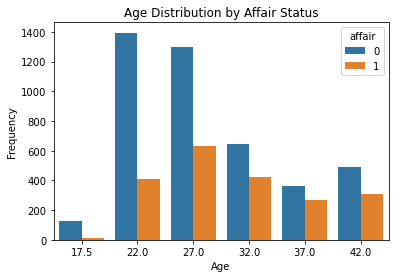

In [35]:
import seaborn as sns
sns.countplot(x='age',data=dta,hue='affair')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')


In [36]:
print("Model Evaluation Using a Validation Set")
from sklearn.model_selection import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


Model Evaluation Using a Validation Set
(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [39]:
print(model.score(X_train,y_train))
print("Training set has 73% accuracy")
print(model.score(X_test,y_test))

0.72262118491921
Training set has 73% accuracy
0.7319371727748691


In [40]:
print("Use the test data set to predict the class / labels")
# predict class labels for the test set
predicted = model.predict(X_test)
predicted


Use the test data set to predict the class / labels


array([1., 0., 0., ..., 0., 0., 0.])

In [41]:
# generate class probabilities
probs = model.predict_proba(X_test)
probs

array([[0.34216593, 0.65783407],
       [0.910307  , 0.089693  ],
       [0.71607815, 0.28392185],
       ...,
       [0.54385192, 0.45614808],
       [0.8180886 , 0.1819114 ],
       [0.74151313, 0.25848687]])

In [42]:
print('Evaluating the model')
# generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))
print("The accuracy of the model is 73% similar to the training data.")


Evaluating the model
0.7319371727748691
0.7462300280306123
The accuracy of the model is 73% similar to the training data.


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

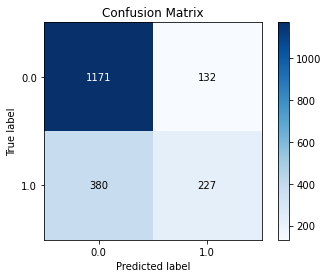

In [43]:
#Using confusion matrix to describe the performance of the classification mo
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predicted)


In [44]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

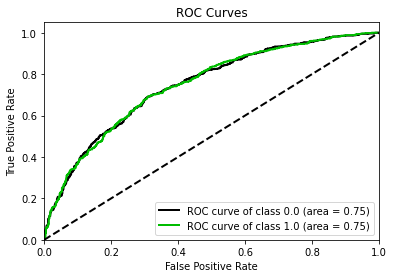

In [45]:
# Plotting the true positive rate (TPR) against the false positive rate (FPR)
scikitplot.metrics.plot_roc_curve(y_test, probs,curves=['each_class'])

In [46]:
#accuracy report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.72      0.73      0.71      1910



In [47]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted)
type(cf)

numpy.ndarray

In [48]:
cf.shape


(2, 2)

In [49]:
#Calculation of Precision Recall and F1 score
TN = cf[0,0] #True Negative
FP = cf[0,1] #False Positive
FN = cf[1,0] #False Negative
TP = cf[1,1] #True Positive
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 *(Precision * Recall)) / (Precision + Recall)
print("Precision : {} , Recall : {}, F1 : {}".format(Precision,Recall,F1))


Precision : 0.6323119777158774 , Recall : 0.37397034596375617, F1 : 0.46997929606625255


In [50]:
#Calculation of True Positive Rate and False Positive Rate
TPR = (TP) / (TP + FN ) #equal to Recall
FPR = FP / (FP + TN )
print("True Positive Rate : {}, False Positive Rate : {}".format(TPR,FPR))

True Positive Rate : 0.37397034596375617, False Positive Rate : 0.10130468150422103


In [51]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72370487, 0.69701727, 0.73626374, 0.70957614, 0.71428571,
        0.73155416, 0.72798742, 0.70440252, 0.75314465, 0.75157233]),
 0.724950880206945)

In [52]:
# Let's predict the probability of an affair for a random woman not present
# She's a 30-year-old teacher who graduated college, has been married for 10
# as strongly religious, rates her marriage as fair, and her husband is a farmer


print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30,31,3,5,6]])))


[[0.30418149 0.69581851]]


In [53]:
print('Predicting the Probability of an Affair')
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3,0,0, 25,23,26]])))
print('The predicted probability of an affair is 23%')


Predicting the Probability of an Affair
[[9.99622525e-01 3.77475343e-04]]
The predicted probability of an affair is 23%
